In [10]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import imageio.v2 as imageio
from IPython.display import Image, display,HTML

In [11]:
class GridWorldEnv(gym.Env):
    """
    Custom GridWorld Environment
    """
    metadata = {'render.modes': ['human']}
    
    def __init__(self, grid_size=(5, 5), goal=(4, 4)):
        super(GridWorldEnv, self).__init__()
        
        self.grid_size = grid_size
        self.goal = goal
        
        # Action space: 0=Up, 1=Down, 2=Left, 3=Right
        self.action_space = gym.spaces.Discrete(4)
        # Observation space: A grid with (row, col)
        self.observation_space = gym.spaces.MultiDiscrete([grid_size[0], grid_size[1]])
        
        self.reset()
    
    def reset(self):
        """
        Resets the environment to the initial state.
        """
        self.agent_pos = np.array([0, 0])
        return self.agent_pos
    
    def step(self, action):
        """
        Take an action and return the next state, reward, done, and info.
        """
        row, col = self.agent_pos
        
        # Apply action
        if action == 0:  # Up
            row = max(row - 1, 0)
        elif action == 1:  # Down
            row = min(row + 1, self.grid_size[0] - 1)
        elif action == 2:  # Left
            col = max(col - 1, 0)
        elif action == 3:  # Right
            col = min(col + 1, self.grid_size[1] - 1)
        
        self.agent_pos = np.array([row, col])
        
        # Check if goal reached
        if np.array_equal(self.agent_pos, self.goal):
            reward = 10
            done = True
        else:
            reward = -1  # Penalty for each step
            done = False
        
        return self.agent_pos, reward, done, {}
    
    def render(self, mode='human'):
        """
        Render the environment and return a frame as an image array.
        """
        grid = np.zeros(self.grid_size)
        grid[self.goal[0], self.goal[1]] = 2  # Goal position
        grid[self.agent_pos[0], self.agent_pos[1]] = 1  # Agent position
        
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.imshow(grid, cmap="coolwarm", origin="upper")
        ax.set_xticks(range(self.grid_size[1]))
        ax.set_yticks(range(self.grid_size[0]))
        ax.set_xticks(np.arange(-.5, self.grid_size[1], 1), minor=True)
        ax.set_yticks(np.arange(-.5, self.grid_size[0], 1), minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
        ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        
        # Save the frame to an array
        fig.canvas.draw()
        frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        plt.close(fig)
        return frame

C:\Users\sanja\AppData\Local\Temp\ipykernel_26348\4094585096.py:74: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


GIF saved as 'gridworld_simulation.gif'


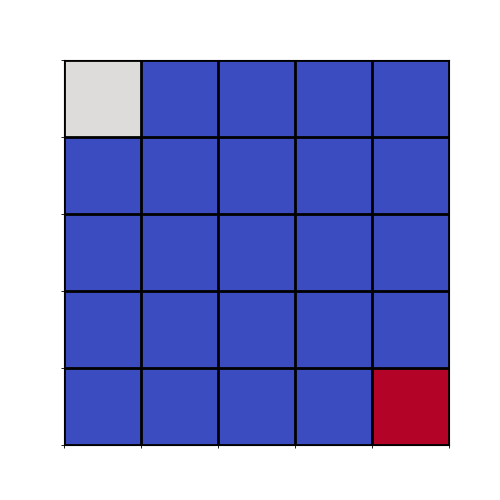

Video saved as 'gridworld_simulation.mp4'


In [12]:
if __name__ == "__main__":
    env = GridWorldEnv()
    obs = env.reset()
    
    frames = []  # To store the frames
    done = False
    
    while not done:
        frame = env.render()
        frames.append(frame)  # Save the rendered frame
        
        action = env.action_space.sample()  # Random action
        obs, reward, done, info = env.step(action)
    
    # Create GIF
    imageio.mimsave('gridworld_simulation.gif', frames, fps=2)
    print("GIF saved as 'gridworld_simulation.gif'")
    display(Image(filename='gridworld_simulation.gif'))
    
    # Optional: Save as MP4 Video
    # Uncomment below if you want a video version instead of GIF
    import cv2
    from IPython.display import Image, display
    height, width, layers = frames[0].shape
    video = cv2.VideoWriter('gridworld_simulation.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 2, (width, height))
    for frame in frames:
        video.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
    video.release()
    print("Video saved as 'gridworld_simulation.mp4'")
    HTML("""
    <video width="640" height="480" controls autoplay loop>
    <source src="gridworld_simulation.mp4" type="video/mp4">
    Your browser does not support the video tag.
    </video>
    """)

In the visualization, we see the agent starting at the top-left corner of the grid. Each frame represents one step. Initially, the agent explores randomly, taking actions like moving up, down, left, or right. Over time, the agent makes its way closer to the goal at the bottom-right corner. Once the agent reaches the goal, the episode ends, and a positive reward is given. This demonstrates the structure of an RL task: exploration, transitions, and rewards.